In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

In [2]:
#configuração da plotagem dos graficos
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [3]:
usxy = ['^FVX', '^TNX','^TYX']
usxy_p = pd.DataFrame()

for u in usxy:
    usxy_p[u]=wb.DataReader(u, data_source='yahoo', start='2001-1-1')['Adj Close']

usxy_p

,^FVX,^TNX,^TYX
Date,,,
2001-01-02,4.752,4.917,5.350
2001-01-03,4.923,5.097,5.463
2001-01-04,4.808,5.013,5.435
2001-01-05,4.672,4.948,5.414
2001-01-08,4.601,4.897,5.408
...,...,...,...
2022-01-24,1.514,1.735,2.083
2022-01-25,1.566,1.783,2.129
2022-01-26,1.650,1.848,2.167


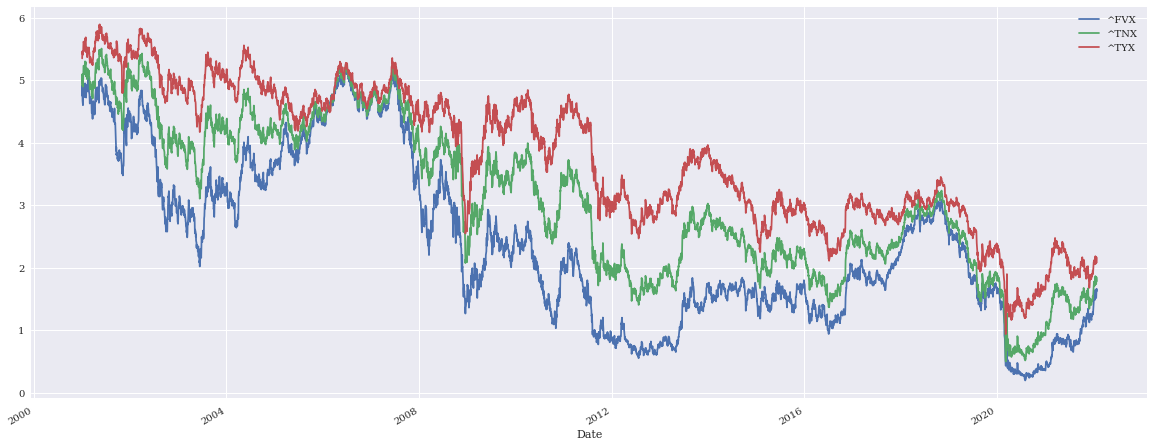

In [4]:
usxy_p.plot(figsize=(20, 8));

In [5]:
usxy_p['5-10']= usxy_p['^TNX'] - usxy_p['^FVX']
usxy_p['10-30']= usxy_p['^TYX'] - usxy_p['^TNX']

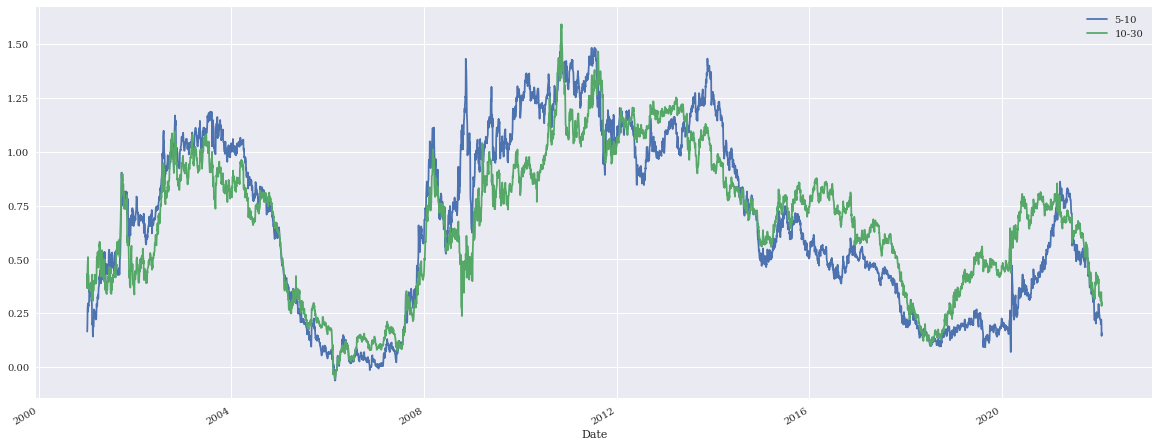

In [6]:
usxy_p[['5-10', '10-30']].plot(figsize=(20,8));

In [7]:
# uso de RSI 


In [8]:
PG_data = pd.DataFrame(wb.DataReader('PG', data_source='yahoo', start='2000-1-1')['Adj Close'])
US10Y_data = pd.DataFrame(wb.DataReader('^TNX', data_source='yahoo', start='2000-1-1')['Adj Close'])

In [9]:
PG_data.tail()

,Adj Close
Date,
2022-01-24,161.300003
2022-01-25,159.539993
2022-01-26,158.149994
2022-01-27,159.130005
2022-01-28,160.500000


In [10]:
PG_data['Dif'] = PG_data['Adj Close'].pct_change()
PG_data['RSI-9'] = ta.rsi(PG_data['Adj Close'], length=9)

PG_data['RSI-9-v'] = ta.rsi(PG_data['Dif'], length=9)

In [11]:
US10Y_data['Dif'] = US10Y_data['Adj Close'].pct_change()
US10Y_data['RSI-9'] = ta.rsi(US10Y_data['Adj Close'], length=9)

US10Y_data['RSI-9-v'] = ta.rsi(US10Y_data['Dif'], length=9)

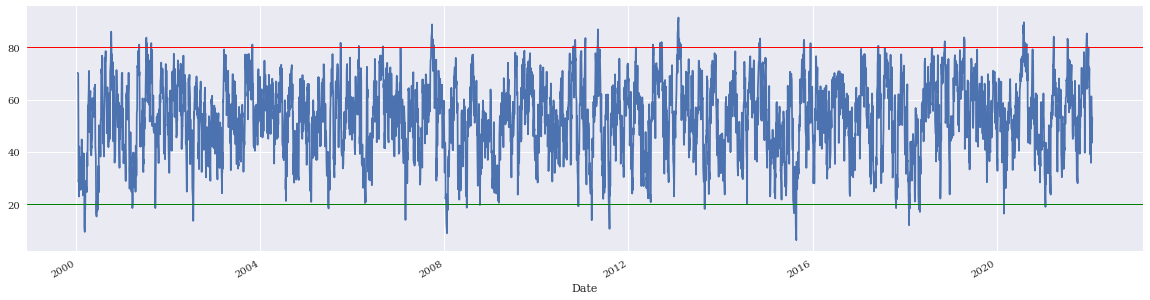

In [12]:
plt.figure(figsize=(20, 5))
PG_data['RSI-9'].plot()
plt.axhline(y=20, lw=1.0, color='g')
plt.axhline(y=80, lw=1.0, color='r')
plt.show()

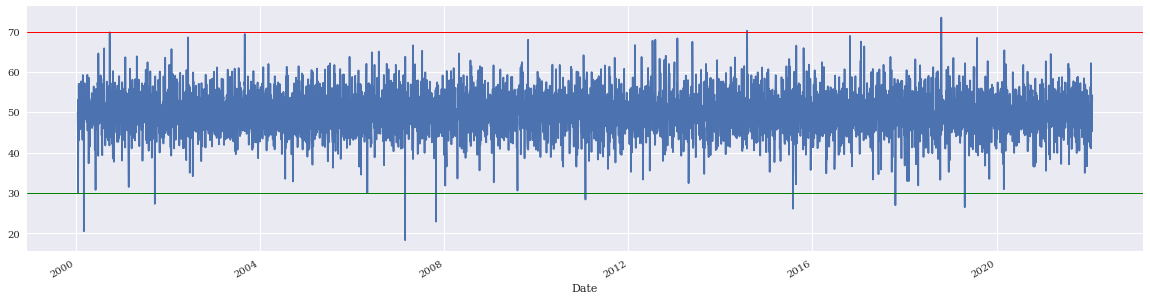

In [13]:
plt.figure(figsize=(20, 5))
PG_data['RSI-9-v'].plot()
plt.axhline(y=30, lw=1.0, color='g')
plt.axhline(y=70, lw=1.0, color='r')
plt.show()

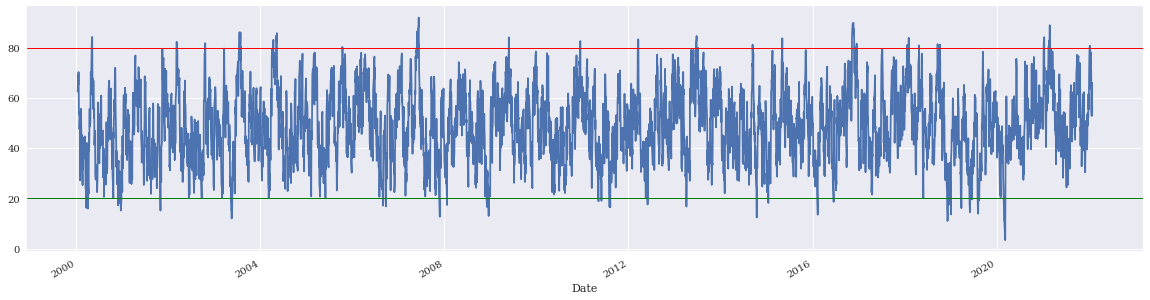

In [14]:
plt.figure(figsize=(20, 5))
US10Y_data['RSI-9'].plot()
plt.axhline(y=20, lw=1.0, color='g')
plt.axhline(y=80, lw=1.0, color='r')
plt.show()

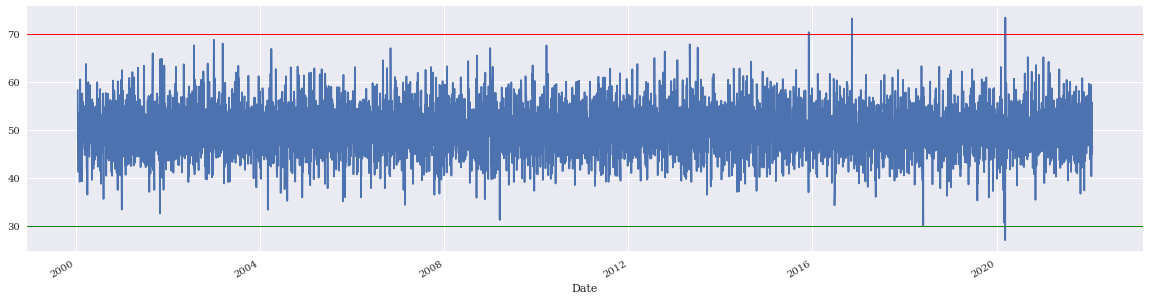

In [15]:
plt.figure(figsize=(20, 5))
US10Y_data['RSI-9-v'].plot()
plt.axhline(y=30, lw=1.0, color='g')
plt.axhline(y=70, lw=1.0, color='r')
plt.show()